In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Fetch data

In [2]:
initial_data_url = "https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6"
final_data_url = "https://data.mendeley.com/datasets/kg72dst75p/1"

In [20]:
data_1a = pd.read_csv("../data/Coronavirus_Data_Cases_1a. Per day.csv", sep=";", encoding="latin-1", index_col=0)
data_1b = pd.read_csv("../data/Coronavirus_Data_Cases_1b. Per date.csv", sep=";", encoding="latin-1", index_col=0)
data_2a = pd.read_csv("../data/Coronavirus_Data_Cases_2a. Per day_population.csv", sep=";", encoding="latin-1", index_col=0)
data_2b = pd.read_csv("../data/Coronavirus_Data_Cases_2b. Per date_population.csv", sep=";", encoding="latin-1", index_col=0)
data_5a = pd.read_csv("../data/Coronavirus_Data_Cases_5a. Per date_popul_surf.csv", sep=";", encoding="latin-1", index_col=0)
data_5b = pd.read_csv("../data/Coronavirus_Data_Cases_5a. Per day_popul_surf.csv", sep=";", encoding="latin-1", index_col=0)

In [4]:
data_1a.head()

,US,"Korea, South",China,Taiwan*,Thailand,Japan,Vietnam,Singapore,France,Nepal,...,Anguilla-United Kingdom,British Virgin Islands-United Kingdom,Turks and Caicos Islands-United Kingdom,MS Zaandam,Botswana,Burundi,Sierra Leone,"Bonaire, Sint Eustatius and Saba-Netherlands",Malawi,Falkland Islands (Islas Malvinas)-United Kingdom
Country/Region,,,,,,,,,,,,,,,,,,,,,
1,1,1,548,1,2,2,2.0,1.0,2.0,1.0,...,2.0,2.0,4.0,2.0,3.0,2.0,1.0,2.0,3.0,1.0
2,1,1,643,1,3,2,2.0,3.0,3.0,1.0,...,2.0,2.0,4.0,2.0,4.0,2.0,2.0,2.0,3.0,NaN
3,2,2,920,3,5,2,2.0,3.0,3.0,1.0,...,2.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,NaN
4,2,2,1406,3,7,2,2.0,4.0,3.0,1.0,...,2.0,3.0,5.0,2.0,4.0,3.0,2.0,NaN,NaN,NaN
5,5,3,2075,4,8,4,2.0,5.0,4.0,1.0,...,2.0,3.0,6.0,9.0,4.0,3.0,4.0,NaN,NaN,NaN


In [5]:
data_2b.head()

,San Marino,Andorra,Luxembourg,Iceland,Faroe Islands-Denmark,Gibraltar-United Kingdom,Spain,Switzerland,Italy,Liechtenstein,...,Bangladesh,Tanzania,Ethiopia,Mozambique,Nepal,Angola,Burundi,Sudan,Malawi,Papua New Guinea
Population,33931.0,77265.0,625978.0,341243.0,48863.0,33691.0,46754778.0,8654622.0,60461826.0,38128.0,...,164689383.0,59734218.0,114963588.0,31255435.0,2.913681e+07,32866272.0,11890784.0,43849260.0,19129952.0,8947024.0
22/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
23/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
24/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
25/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.432085e-02,0.0,0.0,0.0,0.0,0.0


# Cleaning Data
## Adjust Data Types

In [6]:
#data_1b = data_1b.select_dtypes(exclude=["object"]) #Columns need to be adjusted, not excluded
#assert np.all(data_1b.dtypes == np.float64)
#problem is the last ratio row, when the datatype is not a numeric change the values into pd.NaN

# Visualizations (Cases per Day)

[ ] Select only 30 countries, respectively

In [72]:
#The date dataset contains five additional rows with statistics 
#Truncate them for consistency of the dataset (each row refers to a specific date)
data_1b_trunc = data_1b.apply(pd.to_numeric, args={'coerce'})
data_1b_trunc = data_1b_trunc[:-5]

In [99]:
first_day_1a = data_1a.columns #Needs to be adapted to display the order of the countries according to their first occurence of cases 
data_1a_trunc = data_1a#[data_1a.columns[first_day_1a]].loc[:30] #Needs to be adapted to display the first 30 countries with cases
first_occ = data_1b_trunc[data_1a_trunc.columns] > 0
first_occ = first_occ.apply(pd.Series.idxmax)
first_occ = pd.to_datetime(first_occ, dayfirst = True)
first_occ = first_occ.sort_values(ascending = True) 
first_occ = first_occ[:30]
data_1a_trunc = data_1a_trunc[first_occ.index]

In [100]:
last_day = data_1b_trunc.loc['04/04/2020']
last_day = last_day.sort_values(ascending=False)
last_day = last_day[:30]
data_1b_trunc = data_1b_trunc[last_day.index]


## Plot Cases

In [113]:
def plot_cases(data, ax, marker='s', markersize=2):
    ax.plot(data
            , marker=marker
            , markersize=markersize
            , label=data.columns 
            )
    ax.legend(loc='upper left')

### Absolute cases

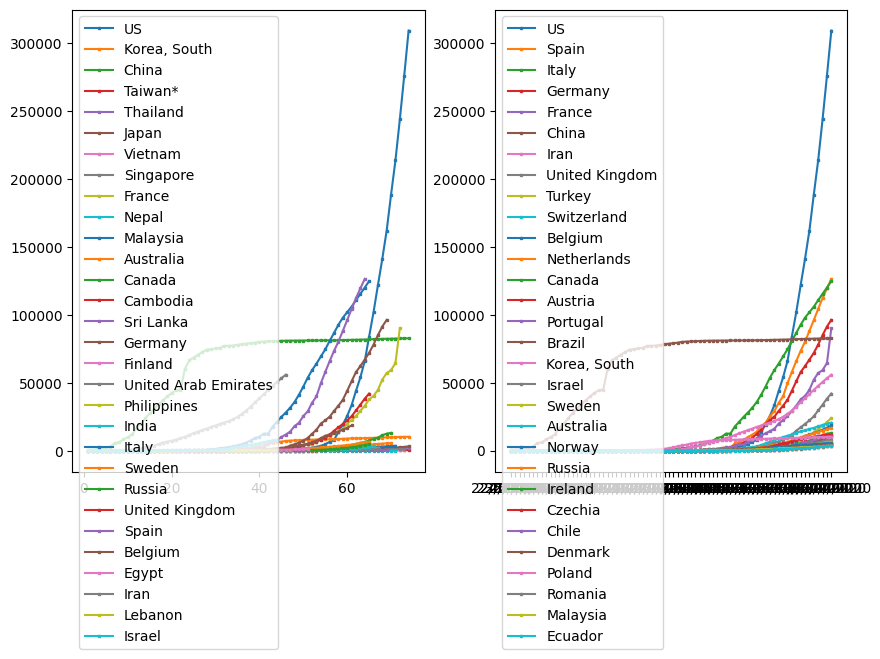

In [114]:
fig, axes = plt.subplots(figsize=(10, 6), ncols=2)

plot_cases(data_1a_trunc, axes[0])
plot_cases(data_1b_trunc, axes[1])

plt.show() #TODO Split legend like in paper
fig.savefig("../figures/Fig1.png")

# Agglomerative Clustering